# Which Android and IOS Mobile Apps has the capability to gain more attention due to in-app ads

- Objective: We only build apps that are free to download and install, and our main source of revenue consists of in-app ads. The number of users of our apps determines our revenue for any given app, so the more users who see and engage with the ads, the better.

- The goal of this project: Analyze data to help our developers understand what type of apps are likely to attract more users.


- Please go to: [Apple Store App Documentation](https://www.kaggle.com/ramamet4/app-store-apple-data-set-10k-apps) for more information about the Apple Store App dataset.
- Please fo to: [Google Play App Documentation](https://www.kaggle.com/lava18/google-play-store-apps) for more information about the Google Play App dataset.

- We obtained data from Google Play with approximately 10,000 Android apps that was collected in August 2018
- We obtained data from Google Play with approximately 7,000 Android apps that was collected in July 2017

## Opening and Exploring the Data

- Lets open the Google Play Store and Apple Store Data file
- The data is broken into a header variable (`android_header/IOS_header`)where the name of the columns are and a dataset variable (`android/IOS`)where the rest of the data that houses the Data points will be contained.

In [1]:
from csv import reader

#open Android Data set
open_android_file = open('googleplaystore.csv',encoding="utf8")
read_android_file = reader(open_android_file)
android_dataset = list(read_android_file)
android_header = android_dataset[0]
android = android_dataset[1:]

#open IOS Data set
open_IOS_file = open('AppleStore.csv',encoding="utf8")
read_IOS_file = reader(open_IOS_file)
IOS_dataset = list(read_IOS_file)
IOS_header = IOS_dataset[0]
IOS = IOS_dataset[1:]


Here a function `explore_data` is created to take in four parameters.(The `dataset`, `starting row`, `ending row`, and if the dataset has `rows and columns`.)

This function allows readibility and reusablity to take in a dataset, where a beginning row and ending row can be specified to be printed as an output when the function is called. 

If there are rows and columns available within the dataset, the number of rows and columns will be printed as the output.


In [2]:
def explore_data(dataset, start, end, rows_and_columns=False):
    dataset_slice = dataset[start:end]
    for each_row in dataset_slice:
        print(each_row)
        print('\n') 
        
    if rows_and_columns:
        print('Number of rows:', len(dataset))
        print('Number of columns:', len(dataset[0]))

print('\n Apple Store App Data \n')
print(IOS_header)
print('\n')
explore_data(IOS, 0 , 5, True)





 Apple Store App Data 

['', 'id', 'track_name', 'size_bytes', 'currency', 'price', 'rating_count_tot', 'rating_count_ver', 'user_rating', 'user_rating_ver', 'ver', 'cont_rating', 'prime_genre', 'sup_devices.num', 'ipadSc_urls.num', 'lang.num', 'vpp_lic']


['1', '281656475', 'PAC-MAN Premium', '100788224', 'USD', '3.99', '21292', '26', '4', '4.5', '6.3.5', '4+', 'Games', '38', '5', '10', '1']


['2', '281796108', 'Evernote - stay organized', '158578688', 'USD', '0', '161065', '26', '4', '3.5', '8.2.2', '4+', 'Productivity', '37', '5', '23', '1']


['3', '281940292', 'WeatherBug - Local Weather, Radar, Maps, Alerts', '100524032', 'USD', '0', '188583', '2822', '3.5', '4.5', '5.0.0', '4+', 'Weather', '37', '5', '3', '1']


['4', '282614216', 'eBay: Best App to Buy, Sell, Save! Online Shopping', '128512000', 'USD', '0', '262241', '649', '4', '4.5', '5.10.0', '12+', 'Shopping', '37', '5', '9', '1']


['5', '282935706', 'Bible', '92774400', 'USD', '0', '985920', '5320', '4.5', '5', '7.5.1'

- The total number of rows for Apple store is 7,197.
- The total number of columns is 17.
- The data columns that the analsis may be interested in to get started with our analysis is the `track_name`, `price`, `rating_count_total`, `user_rating`, `cont_rating`, and `prime_genre`.

In [3]:
print('\n Google Play App Data \n')
print(android_header)
print("\n")
explore_data(android, 0 , 5, True)


 Google Play App Data 

['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type', 'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver', 'Android Ver']


['Photo Editor & Candy Camera & Grid & ScrapBook', 'ART_AND_DESIGN', '4.1', '159', '19M', '10,000+', 'Free', '0', 'Everyone', 'Art & Design', 'January 7, 2018', '1.0.0', '4.0.3 and up']


['Coloring book moana', 'ART_AND_DESIGN', '3.9', '967', '14M', '500,000+', 'Free', '0', 'Everyone', 'Art & Design;Pretend Play', 'January 15, 2018', '2.0.0', '4.0.3 and up']


['U Launcher Lite – FREE Live Cool Themes, Hide Apps', 'ART_AND_DESIGN', '4.7', '87510', '8.7M', '5,000,000+', 'Free', '0', 'Everyone', 'Art & Design', 'August 1, 2018', '1.2.4', '4.0.3 and up']


['Sketch - Draw & Paint', 'ART_AND_DESIGN', '4.5', '215644', '25M', '50,000,000+', 'Free', '0', 'Teen', 'Art & Design', 'June 8, 2018', 'Varies with device', '4.2 and up']


['Pixel Draw - Number Art Coloring Book', 'ART_AND_DESIGN', '4.3', '967', '2.8M', '100

- The total number of rows for Apple Store is 10,841.
- The total number of columns is 13.
- The data columns that the analsis may be interested in is the `App`, `Category`, `Rating`, `Reviews`, `Installs`, `Type`, `Price`, `Content Rating`, `Genres`, 

# Cleaning Data Sets
Purpose of detecting data deleting wrong data for analysis purposes would help lower the risk of our data analysis results from being inaccurate.

- To achieve this based on our developer needs, we need to do the following:
1. Correct or remove inaccuare data.
2. Remove duplicates detected.
3. Remove non-English apps.
4. Remove apps that are not free.

Google Play Store Data Set
- Look through the discussion panel to find any rows mentioned by other people to see if any of the data is compromised by any missing value points.
- Row 10474 was found to be missing `Category` column data point.
- Searched through the csv file in Excel to find row 10472 which is the actual row.

# Testing purposes
MISING DATA:
- The total length of data in every row is 13.
- If any row has a length of 12 or less, means there are missing data points.
- If any data are found,print out the row of data to check and than proceed to delete that row of data if its missing values.
- This data may be mentoned as well in the discussion panel. 

In [4]:
print('Length of Header: ')
print(len(android_header))
print(android_header)

print('\nLength of row 10472: ')
print(len(android[10472]))
print(android[10472])

print("\nRows with Missing Data Points Testing Purposes")
for each_row in android:
    length = len(each_row)
    if length < len(android_header):
        print(each_row)
        print('\n')


Length of Header: 
13
['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type', 'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver', 'Android Ver']

Length of row 10472: 
12
['Life Made WI-Fi Touchscreen Photo Frame', '1.9', '19', '3.0M', '1,000+', 'Free', '0', 'Everyone', '', 'February 11, 2018', '1.0.19', '4.0 and up']

Rows with Missing Data Points Testing Purposes
['Life Made WI-Fi Touchscreen Photo Frame', '1.9', '19', '3.0M', '1,000+', 'Free', '0', 'Everyone', '', 'February 11, 2018', '1.0.19', '4.0 and up']




- Check if Apple Play store has any missing Data
- There are no data points missing from the Apple Data Table

In [5]:
print('Length of Header: ')
print(len(IOS_header))
print(IOS_header)

print("\nRows with Missing Data Points Testing Purposes")
for each_row in IOS:
    length = len(each_row[0:])
    if length < len(IOS_header):
        print(each_row)
        print('\n')

Length of Header: 
17
['', 'id', 'track_name', 'size_bytes', 'currency', 'price', 'rating_count_tot', 'rating_count_ver', 'user_rating', 'user_rating_ver', 'ver', 'cont_rating', 'prime_genre', 'sup_devices.num', 'ipadSc_urls.num', 'lang.num', 'vpp_lic']

Rows with Missing Data Points Testing Purposes


# Confirming Deleted row
- Only run delete statement once, or risk deleting extra rows that should not be deleted!

In [6]:
print(len(android)) #Number of rows before deletion
del android[10472] #Deleted row
print(len(android)) #current number of rows after deletion

10841
10840


# Removing Duplicate Records
   # Part One
- In the Google Play Store, there are duplicates that need to be deleted.
- Below is a sample of a few duplicate rows in our data set
- We filter all duplicates by the `Category` Column

-Below in the Google play store data set sample, we are searching each row based on column `Category`, while searching for each data point that has `Instagram` as the value.

-There are four records that are duplicates of the Category Instagram value.

In [7]:
for app in android:
    name = app[0]
    if name == 'Instagram':
        print('\n',app)


 ['Instagram', 'SOCIAL', '4.5', '66577313', 'Varies with device', '1,000,000,000+', 'Free', '0', 'Teen', 'Social', 'July 31, 2018', 'Varies with device', 'Varies with device']

 ['Instagram', 'SOCIAL', '4.5', '66577446', 'Varies with device', '1,000,000,000+', 'Free', '0', 'Teen', 'Social', 'July 31, 2018', 'Varies with device', 'Varies with device']

 ['Instagram', 'SOCIAL', '4.5', '66577313', 'Varies with device', '1,000,000,000+', 'Free', '0', 'Teen', 'Social', 'July 31, 2018', 'Varies with device', 'Varies with device']

 ['Instagram', 'SOCIAL', '4.5', '66509917', 'Varies with device', '1,000,000,000+', 'Free', '0', 'Teen', 'Social', 'July 31, 2018', 'Varies with device', 'Varies with device']


We create a small script to find all names of duplicated data and append them to a created duplicated list `duplicate_apps`.

All unique apps names will be filtered towards the `unique_apps` list.

In [8]:
duplicate_apps = []
unique_apps = []
for app in android:
    name = app[0]
    if name in unique_apps:
        duplicate_apps.append(name)
    else:
        unique_apps.append(name)
print('Number of duplicate apps:', len(duplicate_apps))
print('\n')
print('Number of unique apps:', len(unique_apps[0:]))
print('\n')
print('Examples of duplicaye apps:', duplicate_apps[0:6])

Number of duplicate apps: 1181


Number of unique apps: 9659


Examples of duplicaye apps: ['Quick PDF Scanner + OCR FREE', 'Box', 'Google My Business', 'ZOOM Cloud Meetings', 'join.me - Simple Meetings', 'Box']


In [9]:
print('Expected length:', len(android)-1181)

Expected length: 9659


Check if IOS apps have any duplicates

In [10]:
duplicate_apps = []
ios_unique_apps = []
for app in IOS:
    name = app[0]
    if name in ios_unique_apps:
        duplicate_apps.append(name)
    else:
        ios_unique_apps.append(name)
print('Number of duplicate apps:', len(duplicate_apps))
print('\n')
print('Number of unique apps:', len(ios_unique_apps[0:]))

Number of duplicate apps: 0


Number of unique apps: 7197


# Removing Duplicate Records 
# Part Two

Duplication Criteria
- After examining the rows, the fourth column `Reviews` has varied results for number of reviews which is the only difference in our duplicates who have the same information in every other column. 
- We will only keep the hightest number of reviews and remove the other entries for any given app in order to keep one entry.

Remember in our early analysis we noticed App 'Instagram' had a few entries with the same data except for the `Reviews` column. Now we will filter every single App with different review amounts to gain one entry per app.

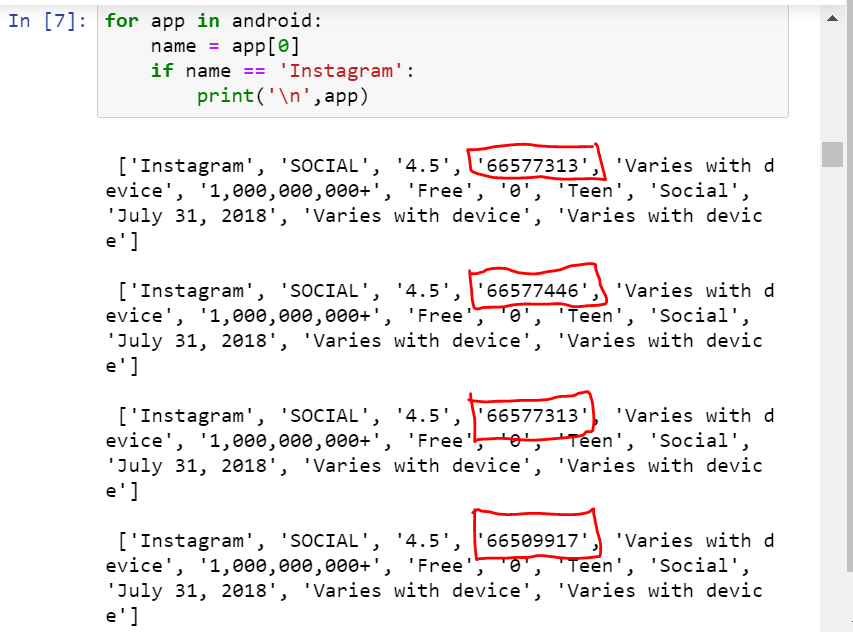

In [11]:
reviews_max = {}

for each_row in android:
    name = each_row[0]
    n_reviews = float(each_row[3])
    
    if name in reviews_max and reviews_max[name] < n_reviews:
        reviews_max[name] = n_reviews
    elif name not in reviews_max:
        reviews_max[name] = n_reviews    

In [12]:

print('Expected length:', len(android) - 1181)
print('Actual length:', len(reviews_max))

Expected length: 9659
Actual length: 9659


Now we must test our `Android dataset` to make sure we removed all the `duplicate rows` from our Android dataset. 

-Creating additional lists to remove duplicates.
`android_clean` list will house only one entry with the highest amount of reviews for each app.
`already_added` will house all duplicate rows.

In [13]:
android_clean = [] #will store our new cleaned data set
already_added = [] #store app names

for each_row in android:
    name = each_row[0]
    n_reviews = float(each_row[3])

    if reviews_max[name] == n_reviews and name not in already_added:
        android_clean.append(each_row)
        already_added.append(name)    
print('Number of Single entry Apps')        
print(len(android_clean))

Number of Single entry Apps
9659


Explore the new data set, and confirm that the number of rows is 9,659 by passing our new List of rows(list os lists) `android_clean` to our `explore_data` function to confirm the total number of rows and columns after we removed all the duplicate data.

In [14]:
explore_data(android_clean, 0, 3, True)

['Photo Editor & Candy Camera & Grid & ScrapBook', 'ART_AND_DESIGN', '4.1', '159', '19M', '10,000+', 'Free', '0', 'Everyone', 'Art & Design', 'January 7, 2018', '1.0.0', '4.0.3 and up']


['U Launcher Lite – FREE Live Cool Themes, Hide Apps', 'ART_AND_DESIGN', '4.7', '87510', '8.7M', '5,000,000+', 'Free', '0', 'Everyone', 'Art & Design', 'August 1, 2018', '1.2.4', '4.0.3 and up']


['Sketch - Draw & Paint', 'ART_AND_DESIGN', '4.5', '215644', '25M', '50,000,000+', 'Free', '0', 'Teen', 'Art & Design', 'June 8, 2018', 'Varies with device', '4.2 and up']


Number of rows: 9659
Number of columns: 13


# Removing non-English Apps
# Part One
- Now we want to delete apps that are non-english apps, as we explore both data sets abit more we notice a few.
- Our audience is mostly english speaking, so to filter our data more, its best to remove these apps.

In [15]:
print(IOS[706][2]) # 2 LESS than in exel
print(IOS[826][2])
print('\n')
print(android_clean[4412][0])
print(android_clean[7940][0])

万年历-值得信赖的日历黄历查询工具
腾讯手机管家-拦截骚扰电话的QQ安全助手


中国語 AQリスニング
لعبة تقدر تربح DZ


Using the ASCII(AMERICAN Standard Code for Information Interchance), we can determine numbers corresponding to the characters we commonly use in English text that range from 0 -127

For example uing the ord() built-in function:

In [16]:
print(ord('a'))
print(ord('A'))
print(ord('万'))
print(ord('5'))
print(ord('+'))

97
65
19975
53
43


If an app name contains characters that is greater than 127, than that probably means the app has a non-English name.
So now we must interate through the App names in order to find all the non-English apps.

For example:

In [17]:
one_string = 'abcd'

for each_character in one_string:
    print(each_character)

a
b
c
d


Now let begin to interate over our App names

In [18]:
def is_English_characters(a_string):
    is_ascii = 0
    for character in a_string:
        ascii_character = ord(character)
        if ascii_character > 127:
            return False
        
    return True

print(is_English_characters('Instagram'))
print(is_English_characters('爱奇艺PPS -《欢乐颂2》电视剧热播'))
print(is_English_characters('Docs To Go™ Free Office Suite'))
print(is_English_characters('Instachat 😜'))

True
False
False
False


We noticed that the Non-English app names funtion does not recognize emojis 'Instachat 😜' or characters like ™ that fall outside of the ASCII range that are over 127. 

In [19]:
print(is_English_characters('Docs To Go™ Free Office Suite'))
print(is_English_characters('Instachat 😜'))
print(ord('😜'))
print(ord('™'))

False
False
128540
8482


To enhance our Non-English function we should add more filter features that will create a counter where all English Apps up to three special characters will be labeled as English

# PART TWO

In [20]:
def is_English_character(a_string):
    counter = 0
    
    for a_character in a_string:
        if ord(a_character) > 127:
            counter += 1
    if counter <= 3:
        return True
    else:
        return False

print(is_English_character('Instagram'))
print(is_English_character('爱奇艺PPS -《欢乐颂2》电视剧热播'))
print(is_English_character('Docs To Go™ Free Office Suite'))
print(is_English_character('Instachat 😜'))


True
False
True
True


We create two seperate lists for our Android data set and Apple data set that will contain only english apps.

- first we'll pass our android_clean and IOS list to `is_English_character` function.

- The `ios_english_app` and `android_english_app`.
will append all english apps to their lists, then we'll take these new lists and pass it to our `explore_data` function which will confirm and return all the apps that are only english apps.

In [21]:
ios_english_app = []
android_english_app = []

for each_app in android_clean:
    name = each_app[0]
    if is_English_character(name):
        android_english_app.append(each_app)

for each_app in IOS:
    name = each_app[2]
    if is_English_character(name):
        ios_english_app.append(each_app)

explore_data(android_english_app, 0, 3, True)
print('\n')
explore_data(ios_english_app, 0, 3, True)

['Photo Editor & Candy Camera & Grid & ScrapBook', 'ART_AND_DESIGN', '4.1', '159', '19M', '10,000+', 'Free', '0', 'Everyone', 'Art & Design', 'January 7, 2018', '1.0.0', '4.0.3 and up']


['U Launcher Lite – FREE Live Cool Themes, Hide Apps', 'ART_AND_DESIGN', '4.7', '87510', '8.7M', '5,000,000+', 'Free', '0', 'Everyone', 'Art & Design', 'August 1, 2018', '1.2.4', '4.0.3 and up']


['Sketch - Draw & Paint', 'ART_AND_DESIGN', '4.5', '215644', '25M', '50,000,000+', 'Free', '0', 'Teen', 'Art & Design', 'June 8, 2018', 'Varies with device', '4.2 and up']


Number of rows: 9614
Number of columns: 13


['1', '281656475', 'PAC-MAN Premium', '100788224', 'USD', '3.99', '21292', '26', '4', '4.5', '6.3.5', '4+', 'Games', '38', '5', '10', '1']


['2', '281796108', 'Evernote - stay organized', '158578688', 'USD', '0', '161065', '26', '4', '3.5', '8.2.2', '4+', 'Productivity', '37', '5', '23', '1']


['3', '281940292', 'WeatherBug - Local Weather, Radar, Maps, Alerts', '100524032', 'USD', '0', '188

# Data Cleaning Process
Objective: We only build apps that are free to download and install, and our main source of revenue consists of in-app ads. Our datasets contain both free and non-free apps.

So far in the data cleaning process:
- Removed inaccurate data
- Removed duplicate app entries
- Removed non-Enlgish apps

Data Cleaning process left to do:
 Our datasets contain both free and non-free apps.
- Isolate only free apps for our data analysis

# Isolating Free Apps
- Creating two seperate lists called `android_final_apps` and `ios_final_apps` will house only the apps that are free in the `price` column. 

- We check each app in the `android-english-app` list and the `ios_english_apps list` to filter apps by `price` criteria.


In [22]:
android_final_apps = []
ios_final_apps = []

for each_app in android_english_app:
    price = each_app[7]
    if price == '0':
        android_final_apps.append(each_app)
            
for each_app in ios_english_app:
    price = each_app[5]
    if price == '0':
        ios_final_apps.append(each_app)
                


In [23]:
print('Android Free Apps \n')
print(len(android_final_apps))
print('\n')
print('IOS Free Apps \n')
print(len(ios_final_apps))

Android Free Apps 

8864


IOS Free Apps 

3222


## Test How many Free apps Remain

In [24]:
print('\nAndroid free Apps \n')
explore_data(android_final_apps, 0, 4, True)
print('\nIOS free Apps\n')
explore_data(ios_final_apps, 0, 4, True)


Android free Apps 

['Photo Editor & Candy Camera & Grid & ScrapBook', 'ART_AND_DESIGN', '4.1', '159', '19M', '10,000+', 'Free', '0', 'Everyone', 'Art & Design', 'January 7, 2018', '1.0.0', '4.0.3 and up']


['U Launcher Lite – FREE Live Cool Themes, Hide Apps', 'ART_AND_DESIGN', '4.7', '87510', '8.7M', '5,000,000+', 'Free', '0', 'Everyone', 'Art & Design', 'August 1, 2018', '1.2.4', '4.0.3 and up']


['Sketch - Draw & Paint', 'ART_AND_DESIGN', '4.5', '215644', '25M', '50,000,000+', 'Free', '0', 'Teen', 'Art & Design', 'June 8, 2018', 'Varies with device', '4.2 and up']


['Pixel Draw - Number Art Coloring Book', 'ART_AND_DESIGN', '4.3', '967', '2.8M', '100,000+', 'Free', '0', 'Everyone', 'Art & Design;Creativity', 'June 20, 2018', '1.1', '4.4 and up']


Number of rows: 8864
Number of columns: 13

IOS free Apps

['2', '281796108', 'Evernote - stay organized', '158578688', 'USD', '0', '161065', '26', '4', '3.5', '8.2.2', '4+', 'Productivity', '37', '5', '23', '1']


['3', '281940292', 

# Most Common Apps by Genre: Part One

As we mentioned in the introduction, our goal is to determine the kinds of apps that are likely to attract more users because the number of people using our apps affect our revenue.
 Now that we have:
 - Remove inaccurate data
 - Remove duplicate app entries
 - Remove non-English apps
 - Isolated the free apps

To minimize risks and overhead, our validation strategy for an app idea has three steps:

- Build a minimal Android version of the app, and add it to Google Play.
- If the app has a good response from users, we develop it further.
- If the app is profitable after six months, we build an iOS version of the app and add it to the App Store.

Because our end goal is to add the app on both Google Play and the App Store, we need to find app profiles that are successful in both markets. 


# Frequency Tables for IOS and Google Play
- `prime_genre` column of the App Store data set.
- `Genres and Category` columns of the Google Play data set.

We'll build two functions we can use to analyze the frequency tables:

- `freq_table` function to generate frequency tables that show percentages.
- `display_table` function we can use to display the percentages in a descending order.

In [25]:
def freq_table(dataset, index):
    
    freq_per_app = {}
    total_apps = 0
    
    for each_row in dataset:
        total_apps += 1
        key = each_row[index]
        if key in freq_per_app:
            freq_per_app[key] += 1
        else:
            freq_per_app[key] = 1
    
    freq_porportions = {}
    freq_percentage = {}
    for each_row in freq_per_app:

        r_porportion = freq_per_app[each_row] / total_apps
        r_percentage = r_porportion * 100
        
        # populate porportion dictionary
        freq_porportions[each_row] = r_porportion
        #populate percentage dictionary
        freq_percentage[each_row] = r_percentage
    
    return freq_percentage
    
def display_table(dataset, index):
    table = freq_table(dataset, index)
    table_display = []
    for key in table:
        key_val_as_tuple = (table[key], key)
        table_display.append(key_val_as_tuple)

    table_sorted = sorted(table_display, reverse = True)
    for entry in table_sorted:
        print(entry[1], ':', entry[0])   

# Part Two

We start by examining the frequency table for the prime_genre column of the Apple App Store data set.

In [26]:
print('\n IOS prime_genre Percentages Table \n')
display_table(ios_final_apps, 12)


 IOS prime_genre Percentages Table 

Games : 58.16263190564867
Entertainment : 7.883302296710118
Photo & Video : 4.9658597144630665
Education : 3.662321539416512
Social Networking : 3.2898820608317814
Shopping : 2.60707635009311
Utilities : 2.5139664804469275
Sports : 2.1415270018621975
Music : 2.0484171322160147
Health & Fitness : 2.0173805090006205
Productivity : 1.7380509000620732
Lifestyle : 1.5828677839851024
News : 1.3345747982619491
Travel : 1.2414649286157666
Finance : 1.1173184357541899
Weather : 0.8690254500310366
Food & Drink : 0.8069522036002483
Reference : 0.5586592178770949
Business : 0.5276225946617008
Book : 0.4345127250155183
Navigation : 0.186219739292365
Medical : 0.186219739292365
Catalogs : 0.12414649286157665


The Top 5 Apple Store App Genre's:
- Games : 58.16%
- Entertainment : 7.88%
- Photo & Video : 4.96%
- Education : 3.66%
- Social Networking : 3.28%

The Bottom 5 Apple Store App Genre's: 
- Business : 0.5%
- Book : 0.4%
- Navigation : 0.1%
- Medical : 0.1%
- Catalogs : 0.1%

There are noticable patterns where social, interactive and fun apps are in the Top 5 versus the Bottom 5 that deals more with business and perhaps research related content.

Most of the apps are designed for practical purposes (education, shopping, utilities, productivity, lifestyle)


Now based on the Android frequency table you can say Games would garner more attention based on 58% of the categories are games. So it must be more popular right? Not necessarily, due to most of the games are related to kids. Not everyone have kids or are around kids. We need a app that most people can use or benefit from.

I would reccomend an app which can be utilized by any age group, provide fun and relaxation. I would reccomend the `TRAVEL` genre which lays more in the middle of the frequency table. 

In [27]:
print('\n Android Category Percentages Table \n')
display_table(android_final_apps, 1)


 Android Category Percentages Table 

FAMILY : 18.907942238267147
GAME : 9.724729241877256
TOOLS : 8.461191335740072
BUSINESS : 4.591606498194946
LIFESTYLE : 3.9034296028880866
PRODUCTIVITY : 3.892148014440433
FINANCE : 3.7003610108303246
MEDICAL : 3.531137184115524
SPORTS : 3.395758122743682
PERSONALIZATION : 3.3167870036101084
COMMUNICATION : 3.2378158844765346
HEALTH_AND_FITNESS : 3.0798736462093865
PHOTOGRAPHY : 2.944494584837545
NEWS_AND_MAGAZINES : 2.7978339350180503
SOCIAL : 2.6624548736462095
TRAVEL_AND_LOCAL : 2.33528880866426
SHOPPING : 2.2450361010830324
BOOKS_AND_REFERENCE : 2.1435018050541514
DATING : 1.861462093862816
VIDEO_PLAYERS : 1.7937725631768955
MAPS_AND_NAVIGATION : 1.3989169675090252
FOOD_AND_DRINK : 1.2409747292418771
EDUCATION : 1.1620036101083033
ENTERTAINMENT : 0.9589350180505415
LIBRARIES_AND_DEMO : 0.9363718411552346
AUTO_AND_VEHICLES : 0.9250902527075812
HOUSE_AND_HOME : 0.8235559566787004
WEATHER : 0.8009927797833934
EVENTS : 0.7107400722021661
PARENTING

Android Top 5 Category Apps: 
- FAMILY : 18.90%
- GAME : 9.72%
- TOOLS : 8.46%
- BUSINESS : 4.59%
- LIFESTYLE : 3.90%

Adroid Bottom 5 Category Apps:
- EVENTS : 0.71%
- PARENTING : 0.65%
- ART_AND_DESIGN : 0.64%
- COMICS : 0.62%
- BEAUTY : 0.59%

A good number of apps are designed for practical purposes (family, tools, business, lifestyle, productivity, etc.). However, if we investigate this further, we can see that the family category (which accounts for almost 19% of the apps) means mostly games for kids.

Besides the top and bottom 5 apps based on the frequency table, I would reccomend any app the more centered towards the middle. The following seems like great candidates:
TRAVEL_AND_LOCAL 
SHOPPING 
BOOKS_AND_REFERENCE 
DATING 
VIDEO_PLAYERS 
MAPS_AND_NAVIGATION

In [28]:
print('\n Android Genres Percentages Table \n')
display_table(android_final_apps, 9)


 Android Genres Percentages Table 

Tools : 8.449909747292418
Entertainment : 6.069494584837545
Education : 5.347472924187725
Business : 4.591606498194946
Productivity : 3.892148014440433
Lifestyle : 3.892148014440433
Finance : 3.7003610108303246
Medical : 3.531137184115524
Sports : 3.463447653429603
Personalization : 3.3167870036101084
Communication : 3.2378158844765346
Action : 3.1024368231046933
Health & Fitness : 3.0798736462093865
Photography : 2.944494584837545
News & Magazines : 2.7978339350180503
Social : 2.6624548736462095
Travel & Local : 2.3240072202166067
Shopping : 2.2450361010830324
Books & Reference : 2.1435018050541514
Simulation : 2.0419675090252705
Dating : 1.861462093862816
Arcade : 1.8501805054151623
Video Players & Editors : 1.7712093862815883
Casual : 1.7599277978339352
Maps & Navigation : 1.3989169675090252
Food & Drink : 1.2409747292418771
Puzzle : 1.128158844765343
Racing : 0.9927797833935018
Role Playing : 0.9363718411552346
Libraries & Demo : 0.9363718411552


The difference between the Genres and the Category columns is not crystal clear, but one thing we can notice is that the Genres column has more categories. So for now we'll just work with the Category column moving forward.

Up to this point, we found that the App Store is dominated by apps designed for fun, while Google Play shows a more balanced landscape of both practical and for-fun apps. Now we'd like to get an idea about the kind of apps that have most users

# Most Popular Apps by Genre on the Apple Store

The frequency tables we analyzed shows us that apps designed for fun dominates the IOS App Store, while google Play shows a more balanced display of both practical and fun apps.

One way to get find out the most popular app by genre is to use the user_ratings per genre, which we can find by analyzing the rating_count_tot of the IOS App Store.
To achieve this, we'll need to do the following:
- Isolate the apps of each genre
- Add up all the user ratings for the apps of that genre
- Divide the sum by the number of apps belonging to that genre

In [29]:
ios_genre = freq_table(ios_final_apps,12)

for each_genre in ios_genre:
    total_num_ratings = 0
    len_genre = 0
    for each_app in ios_final_apps:
        genre_app = each_app[12]
        if genre_app == each_genre:
            n_ratings = float(each_app[6])
            len_genre += 1
            total_num_ratings += n_ratings
    avg_num_usr_rating = total_num_ratings / len_genre
    print(each_genre, ' : ' , avg_num_usr_rating)
    

Productivity  :  21028.410714285714
Weather  :  52279.892857142855
Shopping  :  26919.690476190477
Reference  :  74942.11111111111
Finance  :  31467.944444444445
Music  :  57326.530303030304
Utilities  :  18684.456790123455
Travel  :  28243.8
Social Networking  :  71548.34905660378
Sports  :  23008.898550724636
Health & Fitness  :  23298.015384615384
Games  :  22788.6696905016
Food & Drink  :  33333.92307692308
News  :  21248.023255813954
Book  :  39758.5
Photo & Video  :  28441.54375
Entertainment  :  14029.830708661417
Business  :  7491.117647058823
Lifestyle  :  16485.764705882353
Education  :  7003.983050847458
Navigation  :  86090.33333333333
Medical  :  612.0
Catalogs  :  4004.0


On average, navigation apps have the highest number of user reviews, but this figure is heavily influenced by Waze and Google Maps, which have close to half a million user reviews together:

In [30]:
for app in ios_final_apps:
    if app[12] == 'Navigation':
        print(app[2], ':', app[6]) # print name and number of ratings

Waze - GPS Navigation, Maps & Real-time Traffic : 345046
Geocaching® : 12811
ImmobilienScout24: Real Estate Search in Germany : 187
Railway Route Search : 5
CoPilot GPS – Car Navigation & Offline Maps : 3582
Google Maps - Navigation & Transit : 154911


On average, news apps have the highest number of user reviews, but this figure is heavily influenced by Reddit Official App: All That's Trending and Viral, ABC News - US & World News + Live Video, CNN: Breaking US & World News, Live Video, and Twitter , which have close to half a million user reviews together:

In [31]:
for app in ios_final_apps:
    if app[12] == 'News':
        print(app[2], ':', app[6]) 

ABC News - US & World News + Live Video : 48407
HuffPost - News, Politics & Entertainment : 29107
20 Minutes.fr - l'actualité en continu : 112
Sky News : 118
NBC News : 32881
BFMTV : l'info en continu : 115
CNN: Breaking US & World News, Live Video : 112886
Twitter : 354058
CBS News - Watch Free Live Breaking News : 11691
n-tv Nachrichten : 273
franceinfo - l'actualité & les élections en direct : 162
The Washington Post Classic : 18572
Fox News : 132703
WIRED Magazine : 12074
Lotto Results - Mega Millions Powerball Lottery : 794
MSNBC : 3692
Tagesschau : 233
The Guardian : 8176
SPIEGEL ONLINE - Nachrichten : 299
LotteryHUB : 2417
USA TODAY : 61724
FOCUS Online - Aktuelle Nachrichten : 373
Ticket Scanner for Powerball & MegaMillions Pool : 581
KATWARN : 0
SmartNews - Trending News & Stories : 4645
OPM Alert : 172
AOL: News, Email, Weather & Video : 5233
Smart Channel -New Style of News Reader- : 0
Fresco — Be a part of the news : 219
WSVN Hurricane Tracker : 40
Election Center 2016 : 37

# App Profile Recommendation: Apple Store

One other App that seems popular is Travel:
Alot of the data is spread quite evenly when a user may be focused on the main topics of travel:
- Hotels
- Restaurants
- Transportations
- Deals
- Location

This niche have some decent potential where an app can be created as one-stop shop. Based on location and season, the user can search for quality cheap hotels and transportation. There can be added recommendation based on reviews from customers. This way users don't have to leave the app to search for comments on the business. 

In [32]:
for app in ios_final_apps:
    if app[12] == 'Travel':
        print(app[2], ':', app[6]) 

TripAdvisor Hotels Flights Restaurants : 56194
Yelp - Nearby Restaurants, Shopping & Services : 223885
Google Earth : 446185
Trainline UK: Live Train Times, Tickets & Planner : 248
BlaBlaCar - Trusted Carpooling : 397
DB Navigator : 512
Voyages-sncf.com : book train and bus tickets : 268
Southwest Airlines : 30552
Hotels & Vacation Rentals by Booking.com : 31261
Uber : 49466
Fly Delta : 8094
Airbnb : 22302
iExit Interstate Exit Guide : 1798
GasBuddy : 145549
HotelTonight - Great Deals on Last Minute Hotels : 32341
Expedia Hotels, Flights & Vacation Package Deals : 10278
Viator Tours & Activities : 1839
United Airlines : 5748
飞猪 : 154
HISTORY Here : 685
Ryanair - Cheapest Fares : 175
Lyft : 46922
铁路12306 : 177
Urlaubspiraten : 188
VoiceTra(Voice Translator) : 0
Ab in den Urlaub – Pauschalreisen günstig buchen : 22
Fluege.de - Finde den billigsten Flug : 0
MiFlight™ – Airport security line wait times at checkpoints for domestic and international travelers : 493
FlixBus - bus travel in Eu

# Most Popular Apps by Genre on Google Play

In [33]:
display_table(android_final_apps, 5) # number of google play installs

1,000,000+ : 15.726534296028879
100,000+ : 11.552346570397113
10,000,000+ : 10.548285198555957
10,000+ : 10.198555956678701
1,000+ : 8.393501805054152
100+ : 6.915613718411552
5,000,000+ : 6.825361010830325
500,000+ : 5.561823104693141
50,000+ : 4.7721119133574
5,000+ : 4.512635379061372
10+ : 3.5424187725631766
500+ : 3.2490974729241873
50,000,000+ : 2.3014440433213
100,000,000+ : 2.1322202166064983
50+ : 1.917870036101083
5+ : 0.78971119133574
1+ : 0.5076714801444043
500,000,000+ : 0.2707581227436823
1,000,000,000+ : 0.22563176895306858
0+ : 0.04512635379061372
0 : 0.01128158844765343


Calculating the average number of installs per app genre for google Play dataset will provide us with a visual to see which app genre attract the most users.

In [34]:
category_freq = freq_table(android_final_apps, 1 )

for each_category in category_freq:
    total = 0 #store the sum of installs specific to genre
    len_category = 0 # store number of apps specific to each app
    for each_app in android_final_apps:
        category_app = each_app[1]
        if category_app == each_category:
            n_installs = each_app[5]
            n_installs = n_installs.replace('+','')
            n_installs = n_installs.replace(',','')
            total += float(n_installs)
            len_category += 1
            
    avg_num_installs = total / len_category 
    print(each_category, ":", avg_num_installs)
            
        

ART_AND_DESIGN : 1986335.0877192982
AUTO_AND_VEHICLES : 647317.8170731707
BEAUTY : 513151.88679245283
BOOKS_AND_REFERENCE : 8767811.894736841
BUSINESS : 1712290.1474201474
COMICS : 817657.2727272727
COMMUNICATION : 38456119.167247385
DATING : 854028.8303030303
EDUCATION : 1833495.145631068
ENTERTAINMENT : 11640705.88235294
EVENTS : 253542.22222222222
FINANCE : 1387692.475609756
FOOD_AND_DRINK : 1924897.7363636363
HEALTH_AND_FITNESS : 4188821.9853479853
HOUSE_AND_HOME : 1331540.5616438356
LIBRARIES_AND_DEMO : 638503.734939759
LIFESTYLE : 1437816.2687861272
GAME : 15588015.603248259
FAMILY : 3695641.8198090694
MEDICAL : 120550.61980830671
SOCIAL : 23253652.127118643
SHOPPING : 7036877.311557789
PHOTOGRAPHY : 17840110.40229885
SPORTS : 3638640.1428571427
TRAVEL_AND_LOCAL : 13984077.710144928
TOOLS : 10801391.298666667
PERSONALIZATION : 5201482.6122448975
PRODUCTIVITY : 16787331.344927534
PARENTING : 542603.6206896552
WEATHER : 5074486.197183099
VIDEO_PLAYERS : 24727872.452830188
NEWS_AND_

`Video_Players` has 24,727,872 installs, which I did predict may be a great app to pay attention to, but let's run the numbers first.

In [35]:
for app in android_final_apps:
    if app[1] == 'VIDEO_PLAYERS':
        print(app[0], ':', app[5]) # print name and number of ratings

YouTube : 1,000,000,000+
All Video Downloader 2018 : 1,000,000+
Video Downloader : 10,000,000+
HD Video Player : 1,000,000+
Iqiyi (for tablet) : 1,000,000+
Video Player All Format : 10,000,000+
Motorola Gallery : 100,000,000+
Free TV series : 100,000+
Video Player All Format for Android : 500,000+
VLC for Android : 100,000,000+
Code : 10,000,000+
Vote for : 50,000,000+
XX HD Video downloader-Free Video Downloader : 1,000,000+
OBJECTIVE : 1,000,000+
Music - Mp3 Player : 10,000,000+
HD Movie Video Player : 1,000,000+
YouCut - Video Editor & Video Maker, No Watermark : 5,000,000+
Video Editor,Crop Video,Movie Video,Music,Effects : 1,000,000+
YouTube Studio : 10,000,000+
video player for android : 10,000,000+
Vigo Video : 50,000,000+
Google Play Movies & TV : 1,000,000,000+
HTC Service － DLNA : 10,000,000+
VPlayer : 1,000,000+
MiniMovie - Free Video and Slideshow Editor : 50,000,000+
Samsung Video Library : 50,000,000+
OnePlus Gallery : 1,000,000+
LIKE – Magic Video Maker & Community : 50,

In [36]:
for app in android_final_apps:
    if app[1] == 'VIDEO_PLAYERS' and (app[5] == '1,000,000,000+'
                                or app[5] == '500,000,000+'
                                or app[5] == '100,000,000+'):
        print(app[0], ':', app[5])
       

YouTube : 1,000,000,000+
Motorola Gallery : 100,000,000+
VLC for Android : 100,000,000+
Google Play Movies & TV : 1,000,000,000+
MX Player : 500,000,000+
Dubsmash : 100,000,000+
VivaVideo - Video Editor & Photo Movie : 100,000,000+
VideoShow-Video Editor, Video Maker, Beauty Camera : 100,000,000+
Motorola FM Radio : 100,000,000+


In [37]:
under_100_m = []

for app in android_final_apps:
    n_installs = app[5]
    n_installs = n_installs.replace(',', '')
    n_installs = n_installs.replace('+', '')
    if (app[1] == 'VIDEO_PLAYERS') and (float(n_installs) < 100000000):
        under_100_m.append(float(n_installs))
        
sum(under_100_m) / len(under_100_m)

5544878.133333334

1/5 OF THE APPS make up under 100,000, so that means the majority of the apps (4/5) contain apps that are in the range of 100,000 - 1,000,000,000. Not a good choice.

# App Profile Reccommendation: Google Play Store

`TRAVEL_AND_LOCAL` has a total of 13,984,077 installs.

In [38]:
for app in android_final_apps:
    if app[1] == 'TRAVEL_AND_LOCAL':
        print(app[0], ':', app[5])        

trivago: Hotels & Travel : 50,000,000+
Hopper - Watch & Book Flights : 5,000,000+
TripIt: Travel Organizer : 1,000,000+
Trip by Skyscanner - City & Travel Guide : 500,000+
CityMaps2Go Plan Trips Travel Guide Offline Maps : 1,000,000+
KAYAK Flights, Hotels & Cars : 10,000,000+
World Travel Guide by Triposo : 500,000+
Booking.com Travel Deals : 100,000,000+
Hostelworld: Hostels & Cheap Hotels Travel App : 1,000,000+
Google Trips - Travel Planner : 5,000,000+
GPS Map Free : 5,000,000+
GasBuddy: Find Cheap Gas : 10,000,000+
Southwest Airlines : 5,000,000+
AT&T Navigator: Maps, Traffic : 10,000,000+
VZ Navigator : 50,000,000+
KakaoMap - Map / Navigation : 10,000,000+
AirAsia : 10,000,000+
Expedia Hotels, Flights & Car Rental Travel Deals : 10,000,000+
Goibibo - Flight Hotel Bus Car IRCTC Booking App : 10,000,000+
Allegiant : 1,000,000+
Amtrak : 1,000,000+
JAL (Domestic and international flights) : 1,000,000+
Flight & Hotel Booking App - ixigo : 5,000,000+
VZ Navigator for Tablets : 500,000+

In [39]:
under_100_m = []

for app in android_final_apps:
    n_installs = app[5]
    n_installs = n_installs.replace(',', '')
    n_installs = n_installs.replace('+', '')
    if (app[1] == 'BOOKS_AND_REFERENCE') and (float(n_installs) < 100000000):
        under_100_m.append(float(n_installs))
        
sum(under_100_m) / len(under_100_m)

1437212.2162162163

As we look at the `TRAVEL_AND_LOCAL` Category, we can see very few overly popular apps, which is good. This way, we can take a few ideas from specific apps within this genre to assemble a great app that will draw more user attention.

In [40]:
for app in android_final_apps:
    if app[1] == 'TRAVEL_AND_LOCAL' and (app[5] == '1,000,000,000+'
                                or app[5] == '500,000,000+'
                                or app[5] == '100,000,000+'):
        print(app[0], ':', app[5])
       

Booking.com Travel Deals : 100,000,000+
TripAdvisor Hotels Flights Restaurants Attractions : 100,000,000+
Maps - Navigate & Explore : 1,000,000,000+
Google Street View : 1,000,000,000+
Google Earth : 100,000,000+


`TRAVEL_AND_LOCAL` category has 7,036,877 installs. When looking at the data on which genre garnered more attention by installs. Many of the Apps has installs between 10,000,000 - 50,000,000.

In [41]:
for app in android_final_apps:
    if app[1] == 'TRAVEL_AND_LOCAL' and (app[5] == '1,000,000+'
                                or app[5] == '50,000,000+'
                                or app[5] == '10,000,000+'
                                or app[5] == '5,000,000+'):
        print(app[0], ':', app[5])


trivago: Hotels & Travel : 50,000,000+
Hopper - Watch & Book Flights : 5,000,000+
TripIt: Travel Organizer : 1,000,000+
CityMaps2Go Plan Trips Travel Guide Offline Maps : 1,000,000+
KAYAK Flights, Hotels & Cars : 10,000,000+
Hostelworld: Hostels & Cheap Hotels Travel App : 1,000,000+
Google Trips - Travel Planner : 5,000,000+
GPS Map Free : 5,000,000+
GasBuddy: Find Cheap Gas : 10,000,000+
Southwest Airlines : 5,000,000+
AT&T Navigator: Maps, Traffic : 10,000,000+
VZ Navigator : 50,000,000+
KakaoMap - Map / Navigation : 10,000,000+
AirAsia : 10,000,000+
Expedia Hotels, Flights & Car Rental Travel Deals : 10,000,000+
Goibibo - Flight Hotel Bus Car IRCTC Booking App : 10,000,000+
Allegiant : 1,000,000+
Amtrak : 1,000,000+
JAL (Domestic and international flights) : 1,000,000+
Flight & Hotel Booking App - ixigo : 5,000,000+
Wisepilot for XPERIA™ : 5,000,000+
VZ Navigator for Galaxy S4 : 5,000,000+
MAIN : 1,000,000+
Yoriza Pension - travel, lodging, pension, camping, caravan, pool villas ac

## Conclusion

To conclude and remind us, developers are looking for a particular genre that would attract many users to visit their in-ads, which generates revenue to make more free apps. As we analyzed our data sets from Apple App Store and Google Play Store, we have noticed that immensely popular apps could be skewered by one main app that's popular and have many installs or user_ratings such as News or Video_players. Looking deeply into the numbers by averaging how much attention certain apps get, I have concluded to recommend TRAVEL for IOS and TRAVEL_AND_LOCAL as an app to look more in-depth as their main focus to on creating more free apps. Surprisingly, many people love to travel and would like apps that are very detailed with relevant information. Choosing an app that consists of flights, restaurants, transportation, locations, and other accommodations is very important. 